# Production Planning Optimization using Linear Programming

### Problem Setup:
A factory makes **Tables** and **Chairs**. The company wants to **maximize profit** but has limited **wood** and **labor hours**.

### Product Info:
- Profit: ₹70 per Table, ₹50 per Chair
- Resources Required:
  - Table: 4 ft² wood, 2 labor hours
  - Chair: 3 ft² wood, 1 labor hour
- Total Available: 240 ft² wood, 100 labor hours

### Objective:
Maximize profit while staying within resource limits.


In [ ]:
%pip install pulp

from pulp import *


In [2]:
# Define the LP maximization problem
model = LpProblem("Maximize_Furniture_Profit", LpMaximize)

# Define decision variables
tables = LpVariable("Tables", lowBound=0, cat='Continuous')
chairs = LpVariable("Chairs", lowBound=0, cat='Continuous')

# Objective function: Maximize profit
model += 70 * tables + 50 * chairs, "Total_Profit"

# Add constraints
model += 4 * tables + 3 * chairs <= 240, "Wood_Constraint"
model += 2 * tables + 1 * chairs <= 100, "Labor_Constraint"


In [3]:
model.solve()

print("Status:", LpStatus[model.status])
print(f"Tables to Produce: {tables.varValue:.2f}")
print(f"Chairs to Produce: {chairs.varValue:.2f}")
print(f"Maximum Profit: ₹{value(model.objective):.2f}")


Status: Optimal
Tables to Produce: 30.00
Chairs to Produce: 40.00
Maximum Profit: ₹4100.00


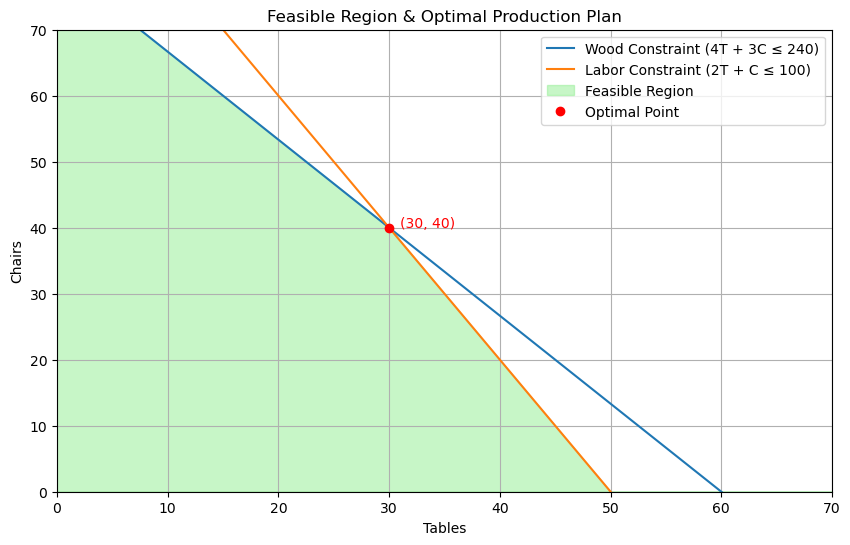

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 70, 400)
y1 = (240 - 4*x) / 3
y2 = (100 - 2*x)

plt.figure(figsize=(10,6))
plt.plot(x, y1, label='Wood Constraint (4T + 3C ≤ 240)')
plt.plot(x, y2, label='Labor Constraint (2T + C ≤ 100)')
plt.fill_between(x, np.minimum(y1, y2), color='lightgreen', alpha=0.5, label='Feasible Region')

plt.plot(tables.varValue, chairs.varValue, 'ro', label='Optimal Point')
plt.text(tables.varValue+1, chairs.varValue, f"({tables.varValue:.0f}, {chairs.varValue:.0f})", color='red')

plt.xlabel("Tables")
plt.ylabel("Chairs")
plt.title("Feasible Region & Optimal Production Plan")
plt.legend()
plt.grid(True)
plt.xlim(0, 70)
plt.ylim(0, 70)
plt.show()


# Insights from Optimization

Status: Optimal
Tables to Produce: 30.00
Chairs to Produce: 40.00
Maximum Profit: ₹4100.00